<img src="Tut 2.2.png" width="900" />

In [434]:
from numpy import log, array, exp, linspace, asarray, argmax, interp, append
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [435]:
R = 8.314 #Kpa.m3/(kmol.K)
CAo = 0.1 # mol/L
V = 500 #L
Ko = 20000 #1/s
Ea = 55000 #J/mol
delHrx = -30000 #J/mol (exothermic)
CpA = 157.9 #J/(mol.K)
CpB = CpA
Q = 2 #L/s

In [436]:
#Question a

In [437]:
from scipy.optimize import fsolve

In [438]:
To = 340 #K

def CSTR(var):
    X = var[0]
    T = To - delHrx*X/(CpA)
    return[X - (Ko/Q)*exp(-Ea/(R*T))*(1-X)*V]   

Xcstr = fsolve(CSTR,0.9) #test both 0.1 and 0.9 as different guess
X = Xcstr[-1]
print('Max conversion for CSTR=', X*100,'%')

#NOTE: depending on first guess for fsolve, X=93.2% or X=2.2% - MULTIPLICITY!

Max conversion for CSTR= 93.3187743465 %


In [439]:
T = To - delHrx*X/(CpA)
T

517.29976126639463

In [440]:
tspan = linspace(To,T,1000)
k1 = (Ko/Q)*exp(-Ea/(R*tspan))
X1 = k1*V/(1+k1*V)
X2 = (CpA*(tspan-To))/-delHrx

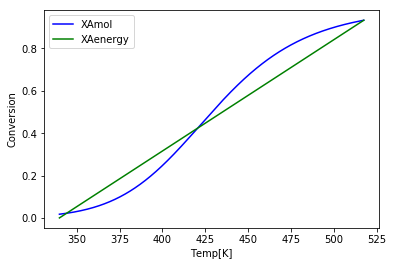

In [441]:
plt.figure(1)
plt.plot(tspan, X1, color='blue', label='XAmol')
plt.plot(tspan, X2, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [442]:
#from the graph, one can see the multiplicity issue

In [443]:
#question b

In [444]:
Qb = 0.8 #L/s

def CSTR1(varb):
    Xb = varb[0]
    Tb = To - delHrx*Xb/(CpA)
    return[Xb - (Ko/Qb)*exp(-Ea/(R*Tb))*(1-Xb)*V]   

Xcstrb = fsolve(CSTR1,0.9) #test both 0.1 and 0.9 as different guess
Xb = Xcstrb[-1]
print('Max conversion for CSTR=', Xb*100,'%')

Max conversion for CSTR= 97.7163041052 %


In [445]:
Tb = To - delHrx*Xb/(CpA)
Tb

525.65478930683776

In [446]:
tspanb = linspace(To,Tb,1000)
kb = (Ko/Qb)*exp(-Ea/(R*tspanb))
Xb1 = kb*V/(1+kb*V)
Xb2 = (CpA*(tspanb-To))/-delHrx

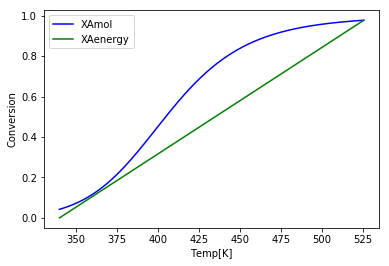

In [447]:
plt.figure(2)
plt.plot(tspanb, Xb1, color='blue', label='XAmol')
plt.plot(tspanb, Xb2, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [448]:
#now one can see multiplicity is no longer an issue

In [449]:
#Question c

In [450]:
Toc = 360 #K

def CSTRc(varc):
    Xc = varc[0]
    Tc = Toc - delHrx*Xc/(CpA)
    return[Xc - (Ko/Q)*exp(-Ea/(R*Tc))*(1-Xc)*V]   

Xcstrc = fsolve(CSTRc,0.9) 
Xc = Xcstrc[-1]
Tc = Toc - delHrx*Xc/(CpA)

print('Max conversion for CSTR=', X*100,'%')

Max conversion for CSTR= 93.3187743465 %


In [451]:
tspanc = linspace(Toc,Tc,1000)
k1c = (Ko/Q)*exp(-Ea/(R*tspanc))
X1c = k1c*V/(1+k1c*V)
X2c = (CpA*(tspanc-Toc))/-delHrx

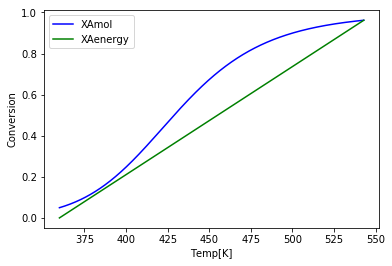

In [452]:
plt.figure(3)
plt.plot(tspanc, X1c, color='blue', label='XAmol')
plt.plot(tspanc, X2c, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [453]:
# We keep changing Toc and rerunning cells until graph shows only one intercept

In [454]:
#Question d

In [455]:
Eanew = 60000 #J/mol

def CSTRd(vard):
    Xd = vard[0]
    Td = To - delHrx*Xd/(CpA)
    return[Xd - (Ko/Q)*exp(-Eanew/(R*Td))*(1-Xd)*V]   

Xcstrd = fsolve(CSTRd,0.9) 
Xd = Xcstrd[-1]
Td = To - delHrx*Xd/(CpA)
print(Td)
print('Max conversion for CSTR=', Xd*100,'%')

340.59460743
Max conversion for CSTR= 0.312961710746 %


In [456]:
tspand = linspace(To,Td,1000)
k1d = (Ko/Q)*exp(-Eanew/(R*tspand))
X1d = k1d*V/(1+k1d*V)
X2d = (CpA*(tspand-To))/-delHrx

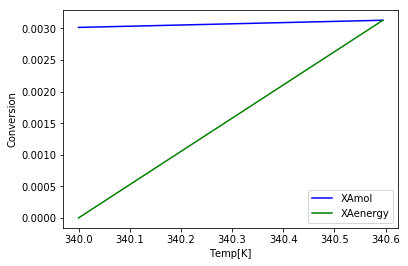

In [457]:
plt.figure(4)
plt.plot(tspand, X1d, color='blue', label='XAmol')
plt.plot(tspand, X2d, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [458]:
#Question e

In [459]:
UA = 31.6 #J/(s.K)
Eae = 55000 #J/mol

Tu = 513.9 #keep changing until X=0.93

def CSTRe(vare):
    Xe = vare[0]
    a = CAo*Q*CpA + UA
    Te = (UA*Tu+CAo*Q*CpA*To)/a - CAo*Q*delHrx*Xe/a
    return[Xe - (Ko/Q)*exp(-Eae/(R*Te))*(1-Xe)*V]   

Xcstre = fsolve(CSTRe,0.9) 
Xe = Xcstre[-1]
a = CAo*Q*CpA + UA
Te = (UA*Tu+CAo*Q*CpA*To)/a - CAo*Q*delHrx*Xe/a
print(Te)
print('Max conversion for CSTR=', Xe*100,'%')

515.298935933
Max conversion for CSTR= 93.0024462046 %


In [460]:
tspane = linspace(To,600,1000)

ke = (Ko/Q)*exp(-Eae/(R*tspane))
Xmb = ke*V/(1+ke*V)
a = CAo*Q*CpA + UA
Xeb = CpA*To/delHrx + (UA*Tu - a*tspane)/(CAo*Q*delHrx)
Xad = CpA*(tspane-To)/(-delHrx)

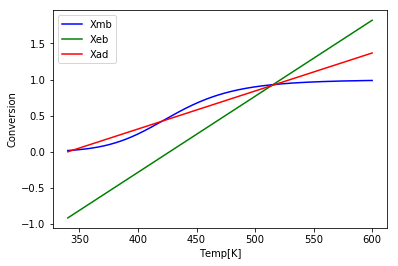

In [461]:
plt.figure(5)
plt.plot(tspane, Xmb, color='blue', label='Xmb')
plt.plot(tspane, Xeb, color='green', label='Xeb')
plt.plot(tspane, Xad, color='red', label='Xad')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()